# 2023-2 언어데이터과학 24강 (2023-11-29) 실습 (2) Word2Vec 단어 벡터 시각화

## 0. 준비

### Source Hans Sans K 글꼴 설치하기

In [1]:
!sudo wget https://raw.githubusercontent.com/adobe-fonts/source-han-sans/release/OTF/Korean/SourceHanSansK-Regular.otf -O /usr/share/fonts/SourceHanSansK-Regular.otf
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


Note that it needs some time to create caches,
especially if there are many large font files.
Wait with patience.

Font directories:
	C:/WINDOWS/fonts
	C:/texlive/2022/texmf-dist/fonts/opentype
	C:/texlive/2022/texmf-dist/fonts/truetype
	C:/WINDOWS/fonts/Deleted
	C:/texlive/2022/texmf-dist/fonts/opentype/adobe
	C:/texlive/2022/texmf-dist/fonts/opentype/arkandis
	C:/texlive/2022/texmf-dist/fonts/opentype/gnome
	C:/texlive/2022/texmf-dist/fonts/opentype/google
	C:/texlive/2022/texmf-dist/fonts/opentype/gust
	C:/texlive/2022/texmf-dist/fonts/opentype/huerta
	C:/texlive/2022/texmf-dist/fonts/opentype/ibm
	C:/texlive/2022/texmf-dist/fonts/opentype/iginomarini
	C:/texlive/2022/texmf-dist/fonts/opentype/impallari
	C:/texlive/2022/texmf-dist/fonts/opentype/kosch
	C:/texlive/2022/texmf-dist/fonts/opentype/novel
	C:/texlive/2022/texmf-dist/fonts/opentype/nowacki
	C:/texlive/2022/texmf-dist/fonts/opentype/omnibus-type
	C:/texlive/2022/texmf-dist/fonts/opentype/public
	C:/texlive/2022/texmf-dist/f

C:/WINDOWS/fonts: failed to write cache
C:/WINDOWS/fonts/Deleted: failed to write cache
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


### Python 모듈 설치하기

In [11]:
%pip install scikit-learn

   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.2 MB 4.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.2 MB 5.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/9.2 MB 4.9 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/9.2 MB 4.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/9.2 MB 4.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.2 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/9.2 MB 4.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.2 MB 4.2 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/9.2 MB 4.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.2 MB 4.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.2 MB 4.4 MB/s eta 0:00:02
   ---------- ------------

## 1. Word2Vec 벡터 모델

In [12]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns

### 기존 모델 로드하기

In [13]:
MODEL_PATH = '../models/word2vec-modu-online'

model = Word2Vec.load(MODEL_PATH)

### 예시: 정도부사 분류하기

In [14]:
mags = ['아주', '완전', '완전히', '무척', '상당히', '매우', '굉장히', '조금']
model.wv.doesnt_match(mags)

'조금'

In [15]:
model.wv.most_similar(['조금'])

[('좀', 0.8294658064842224),
 ('살짝', 0.77390456199646),
 ('쫌', 0.7596133947372437),
 ('조금만', 0.6526569724082947),
 ('좀더', 0.6360096335411072),
 ('쪼끔', 0.6162905097007751),
 ('확실히', 0.5960402488708496),
 ('쪼금', 0.5901409983634949),
 ('좀만', 0.5843324065208435),
 ('한참', 0.583417534828186)]

In [7]:
words = ['아주', '완전', '무척', '매우', '굉장히', '조금', '좀', '살짝', '쫌', '쪼금']

In [20]:
word = words[0]
[model.wv[word] for word in words]
print(np.stack([model.wv[word] for word in words]))

[[-3.51844765e-02 -7.68468738e-01  8.26162025e-02  9.19339657e-02
   6.84133828e-01  1.11034028e-01 -2.63035178e-01  2.13339135e-01
  -9.39208493e-02 -3.10376763e-01  1.71999305e-01  1.30393907e-01
  -4.09692377e-01 -3.66725504e-01  9.21170115e-02 -4.18895334e-01
   1.47327781e-01  8.50434065e-01  4.23176765e-01 -3.74545723e-01
   6.09067976e-01 -3.75220448e-01 -4.44817878e-02  1.85519710e-01
   6.43820703e-01  4.33820397e-01 -3.35056007e-01 -6.18544042e-01
  -3.23276788e-01  3.34925473e-01  6.63393080e-01  6.66629672e-01
   7.28379190e-02 -5.98918557e-01  9.33138561e-03  6.37457147e-02
  -6.94426537e-01  8.86841118e-02 -6.65246129e-01 -6.63010120e-01
   1.63007393e-01 -4.40411597e-01  3.21808755e-01 -4.54987288e-01
   1.71141237e-01  4.20430541e-01 -6.41918242e-01 -1.39775395e+00
   1.77265689e-01 -1.61826044e-01 -8.12370479e-02 -6.97455764e-01
  -8.78396258e-03 -6.53800130e-01 -1.76108554e-01 -5.72461128e-01
  -4.49438905e-03  2.91030526e-01 -1.94748580e-01 -8.60297903e-02
  -3.40029

In [21]:
matrix = pd.DataFrame(np.stack([model.wv[word] for word in words])) # list를 안쓰고 np.stack으로 쌓아 준건 dimesion deducction을 위해서임

matrix

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.035184,-0.768469,0.082616,0.091934,0.684134,0.111034,-0.263035,0.213339,-0.093921,-0.310377,...,0.059400,0.081710,-0.131616,-0.058972,0.019149,0.067069,-0.694292,-0.372928,0.212728,0.354587
1,0.296555,0.180247,-0.387572,0.310893,0.842402,-0.425537,0.603124,-0.203720,-0.008707,-1.038395,...,-0.502477,-0.320970,0.472535,0.744597,0.266030,-0.085246,0.360343,-0.675579,0.036429,0.470466
2,-0.044212,-0.120993,0.043830,0.071330,0.191277,-0.155080,0.027742,0.326430,-0.145226,-0.324709,...,0.372147,-0.119018,0.215985,0.216897,0.134544,0.401389,-0.031203,-0.234102,-0.139929,-0.025113
3,-0.053027,-0.526914,0.308497,0.120977,0.425641,0.199641,-0.064192,0.404837,-0.070975,-0.336214,...,0.068882,-0.065137,-0.009925,0.133804,-0.015085,0.223234,-0.115286,-0.212765,-0.289277,-0.005193
4,-0.252944,-0.614065,-0.013636,0.254386,0.549646,0.043250,0.277252,0.428081,-0.046219,-0.107645,...,-0.196146,-0.009272,0.407563,0.528600,0.451765,0.408586,-0.002725,-0.111295,0.085421,-0.042329
5,0.001957,-0.274674,0.561021,-0.148145,-0.499910,-0.214188,-0.015486,0.555434,-0.085803,-0.697887,...,0.302204,0.215604,0.157036,0.644955,-0.070515,0.428601,0.037990,-0.029502,0.425541,0.322331
6,0.932591,-0.385747,0.338611,-0.178796,-1.005747,-0.355928,-0.172750,0.427599,-0.233417,-0.561924,...,0.128625,0.323541,0.428583,1.477765,-0.206154,0.745334,0.432137,-0.733033,0.086924,-0.500746
7,-0.050947,0.368976,0.408204,-0.299669,-0.130532,-0.341034,0.413058,0.003613,0.308204,-0.145053,...,0.213500,0.012047,0.390851,0.115647,-0.333927,0.184408,-0.399116,-0.174075,0.026890,0.501780
8,0.168731,0.134313,0.160681,-0.182558,-0.627673,-0.108484,0.250283,0.419010,0.030340,-0.320828,...,0.359995,-0.036290,0.276871,0.302078,-0.354852,0.470024,0.078832,-0.499991,-0.201900,-0.379935
9,0.145365,0.296378,-0.058951,-0.169823,-0.200565,-0.108468,0.271372,0.154801,-0.006623,-0.265323,...,0.365688,0.087513,-0.009085,-0.007293,-0.011141,0.235862,0.123791,-0.053032,0.068541,0.025347


In [22]:
matrix.index = words
matrix

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
아주,-0.035184,-0.768469,0.082616,0.091934,0.684134,0.111034,-0.263035,0.213339,-0.093921,-0.310377,...,0.059400,0.081710,-0.131616,-0.058972,0.019149,0.067069,-0.694292,-0.372928,0.212728,0.354587
완전,0.296555,0.180247,-0.387572,0.310893,0.842402,-0.425537,0.603124,-0.203720,-0.008707,-1.038395,...,-0.502477,-0.320970,0.472535,0.744597,0.266030,-0.085246,0.360343,-0.675579,0.036429,0.470466
무척,-0.044212,-0.120993,0.043830,0.071330,0.191277,-0.155080,0.027742,0.326430,-0.145226,-0.324709,...,0.372147,-0.119018,0.215985,0.216897,0.134544,0.401389,-0.031203,-0.234102,-0.139929,-0.025113
매우,-0.053027,-0.526914,0.308497,0.120977,0.425641,0.199641,-0.064192,0.404837,-0.070975,-0.336214,...,0.068882,-0.065137,-0.009925,0.133804,-0.015085,0.223234,-0.115286,-0.212765,-0.289277,-0.005193
굉장히,-0.252944,-0.614065,-0.013636,0.254386,0.549646,0.043250,0.277252,0.428081,-0.046219,-0.107645,...,-0.196146,-0.009272,0.407563,0.528600,0.451765,0.408586,-0.002725,-0.111295,0.085421,-0.042329
조금,0.001957,-0.274674,0.561021,-0.148145,-0.499910,-0.214188,-0.015486,0.555434,-0.085803,-0.697887,...,0.302204,0.215604,0.157036,0.644955,-0.070515,0.428601,0.037990,-0.029502,0.425541,0.322331
좀,0.932591,-0.385747,0.338611,-0.178796,-1.005747,-0.355928,-0.172750,0.427599,-0.233417,-0.561924,...,0.128625,0.323541,0.428583,1.477765,-0.206154,0.745334,0.432137,-0.733033,0.086924,-0.500746
살짝,-0.050947,0.368976,0.408204,-0.299669,-0.130532,-0.341034,0.413058,0.003613,0.308204,-0.145053,...,0.213500,0.012047,0.390851,0.115647,-0.333927,0.184408,-0.399116,-0.174075,0.026890,0.501780
쫌,0.168731,0.134313,0.160681,-0.182558,-0.627673,-0.108484,0.250283,0.419010,0.030340,-0.320828,...,0.359995,-0.036290,0.276871,0.302078,-0.354852,0.470024,0.078832,-0.499991,-0.201900,-0.379935
쪼금,0.145365,0.296378,-0.058951,-0.169823,-0.200565,-0.108468,0.271372,0.154801,-0.006623,-0.265323,...,0.365688,0.087513,-0.009085,-0.007293,-0.011141,0.235862,0.123791,-0.053032,0.068541,0.025347


## 2. 차원 축소

100차원 벡터를 2차원으로 축소해서 좌표평면에 나타낼 수 있게 만든다.

In [30]:
tsne = TSNE(perplexity=1, random_state=174)
matrix2d = tsne.fit_transform(matrix)
matrix2d

array([[ -33.552155, -120.835144],
       [-137.67354 ,  -25.399115],
       [ -90.59762 ,  -53.731255],
       [ -82.64334 ,  -90.18547 ],
       [-118.37184 , -137.7278  ],
       [ -50.12575 ,  156.32967 ],
       [ -52.907864,  205.69965 ],
       [ -45.6477  ,  101.43226 ],
       [  15.195642,   28.502266],
       [ -34.247345,   40.87982 ]], dtype=float32)

In [31]:
matrix2d = pd.DataFrame(matrix2d)
matrix2d.index = words
matrix2d.columns = ['x', 'y']
matrix2d['category'] = ['aug'] * 5 + ['dim'] * 5
matrix2d

,x,y,category
아주,-33.552155,-120.835144,aug
완전,-137.673538,-25.399115,aug
무척,-90.597618,-53.731255,aug
매우,-82.643341,-90.185471,aug
굉장히,-118.371841,-137.727798,aug
조금,-50.125751,156.329666,dim
좀,-52.907864,205.699646,dim
살짝,-45.647701,101.432259,dim
쫌,15.195642,28.502266,dim
쪼금,-34.247345,40.879822,dim


## 3. 시각화

### 산점도(scatterplot)

<Axes: xlabel='x', ylabel='y'>

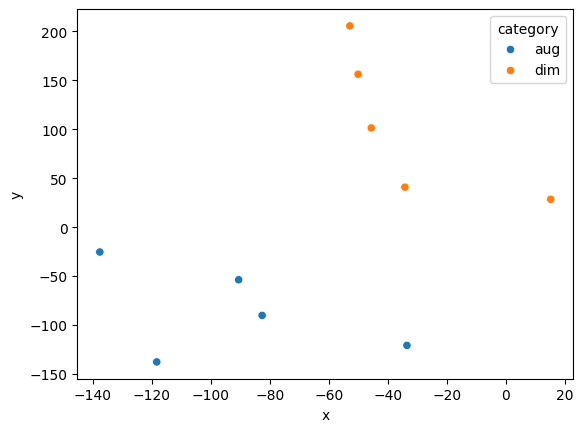

In [32]:
sns.scatterplot(x='x', y='y', data=matrix2d, hue='category') # EDIT THIS LINE

<Axes: xlabel='x', ylabel='y'>

findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not found.
findfont: Font family 'Source Han Sans K' not 

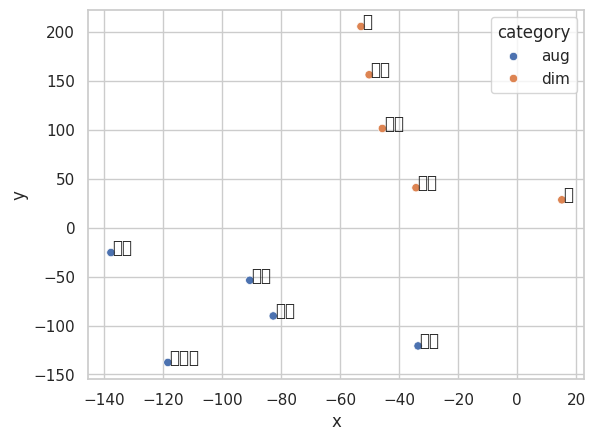

In [33]:
sns.set_theme(font='Source Han Sans K',style='whitegrid')

ax = sns.scatterplot(x='x', y='y', data=matrix2d, hue='category') # EDIT THIS LINE

for index, row in matrix2d.iterrows():
    ax.text(row['x']+.5, row['y'], index)

ax